In [1]:
import pandas as pd

# Load dataset
try:
    df = pd.read_csv('owid-covid-data.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Dataset file not found. Please check the file path.")

# Preview
df.head()
df.info()
df.isnull().sum()


✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                    

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [2]:
# 1. Filter countries of interest
countries_of_interest = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
print(f"✅ Filtered data for {len(countries_of_interest)} countries")

# 2. Convert date column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
print("✅ Converted date column to datetime")

# 3. Drop rows with missing dates
df_filtered = df_filtered.dropna(subset=['date'])
print("✅ Removed rows with missing dates")

# 4. Handle missing numeric values
# For critical columns, we'll use forward fill (ffill) followed by backward fill (bfill)
critical_columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
                   'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

# Forward fill missing values
df_filtered[critical_columns] = df_filtered[critical_columns].fillna(method='ffill')
# Backward fill any remaining missing values at the start of the dataset
df_filtered[critical_columns] = df_filtered[critical_columns].fillna(method='bfill')
print("✅ Handled missing values in critical columns")

# Display the shape of the cleaned dataset
print(f"\nCleaned dataset shape: {df_filtered.shape}")

# Display first few rows of cleaned data
print("\nPreview of cleaned data:")
df_filtered.head()

✅ Filtered data for 3 countries
✅ Converted date column to datetime
✅ Removed rows with missing dates
✅ Handled missing values in critical columns

Cleaned dataset shape: (5030, 67)

Preview of cleaned data:


C:\Users\alyls\AppData\Local\Temp\ipykernel_9704\3980363804.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[critical_columns] = df_filtered[critical_columns].fillna(method='ffill')
C:\Users\alyls\AppData\Local\Temp\ipykernel_9704\3980363804.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[critical_columns] = df_filtered[critical_columns].fillna(method='bfill')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


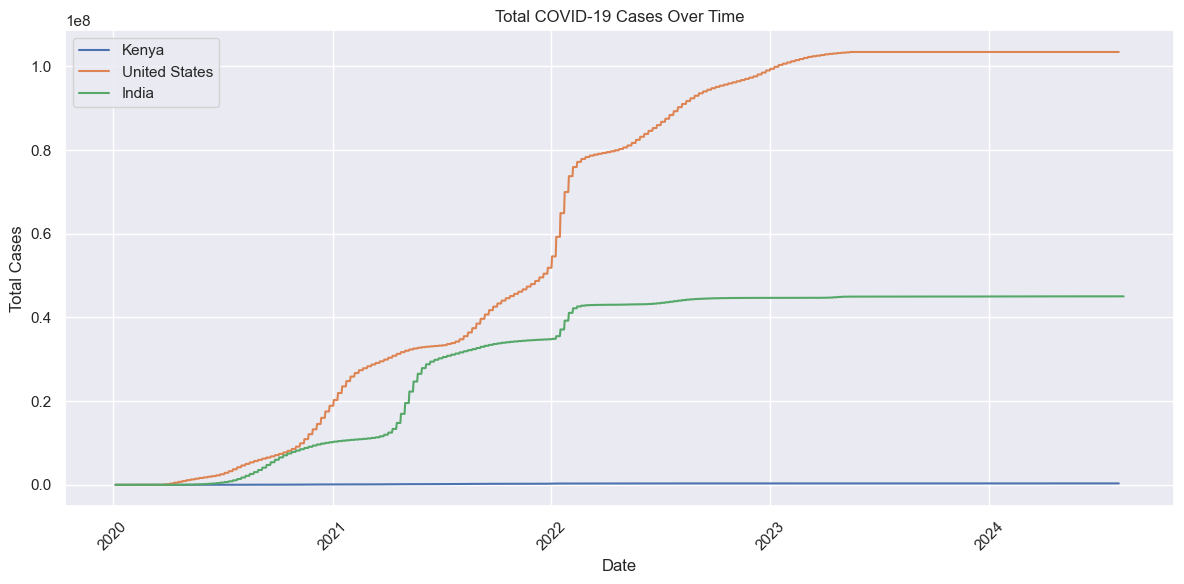

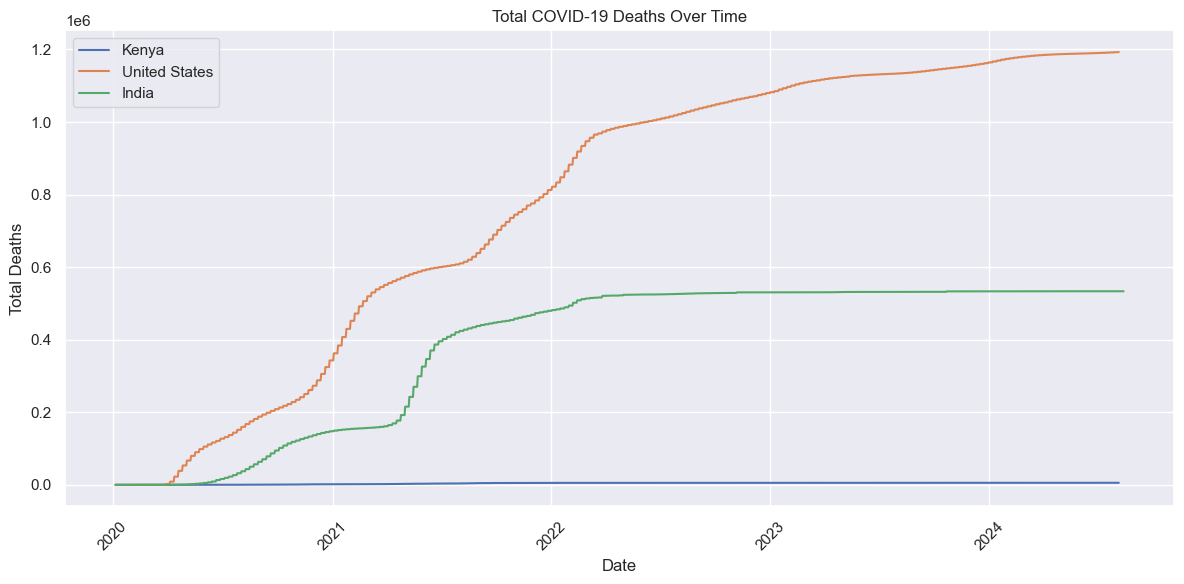

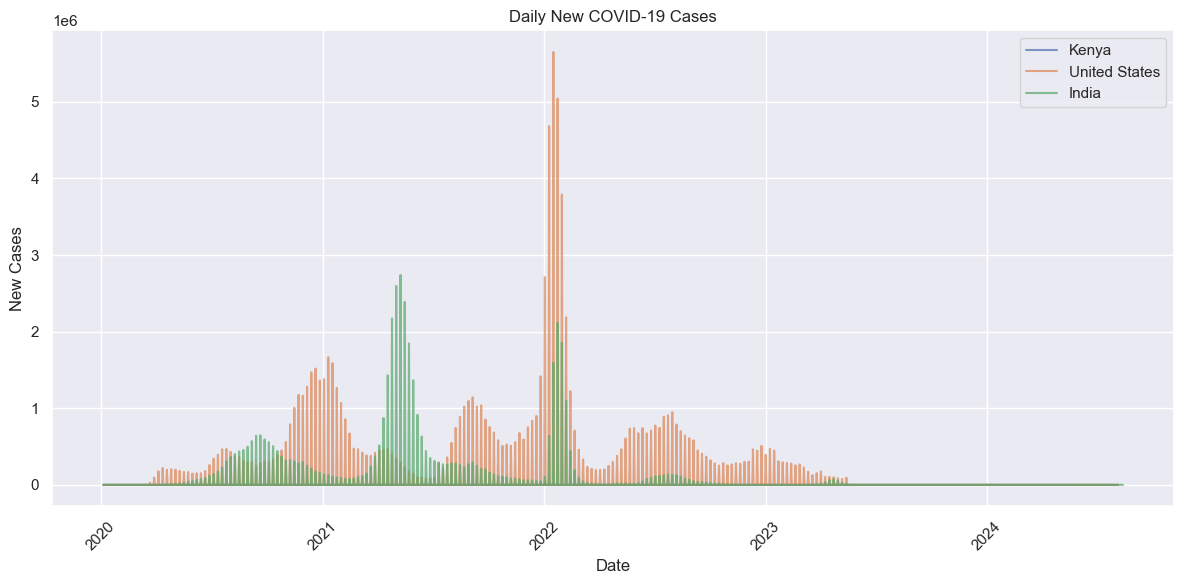

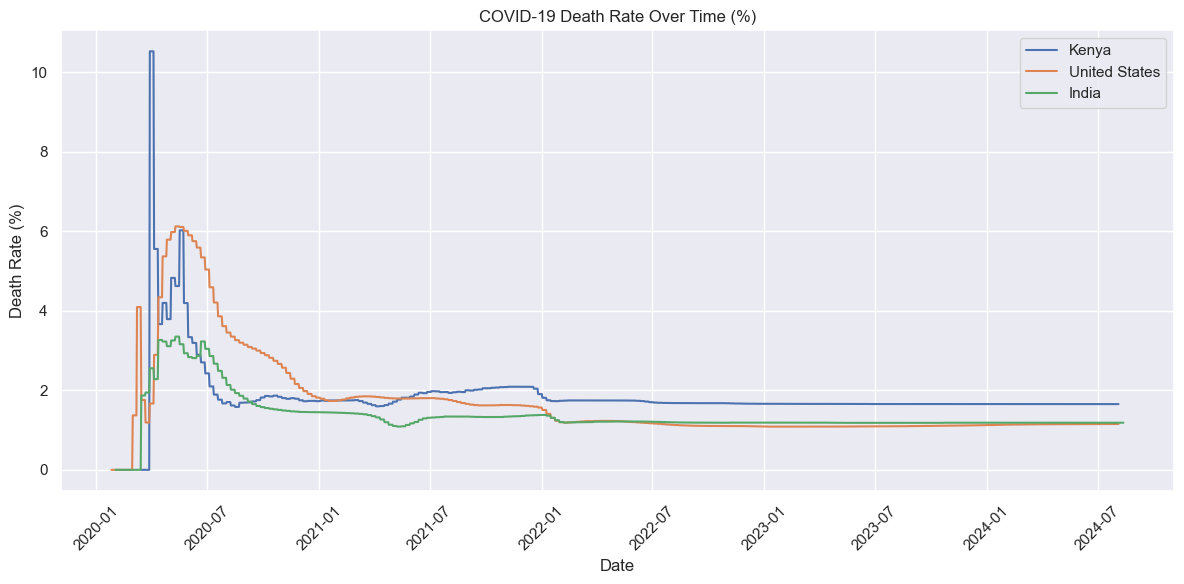

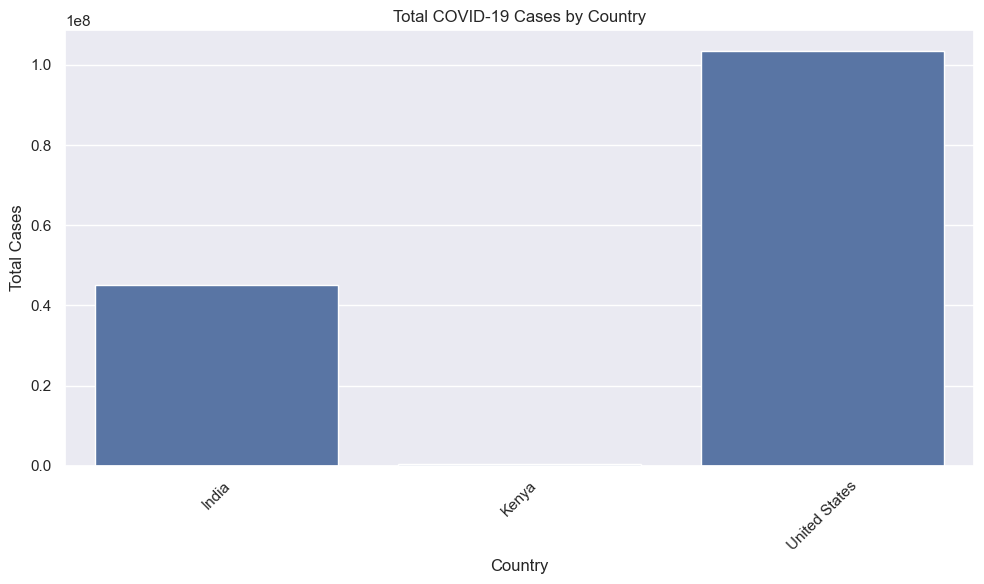

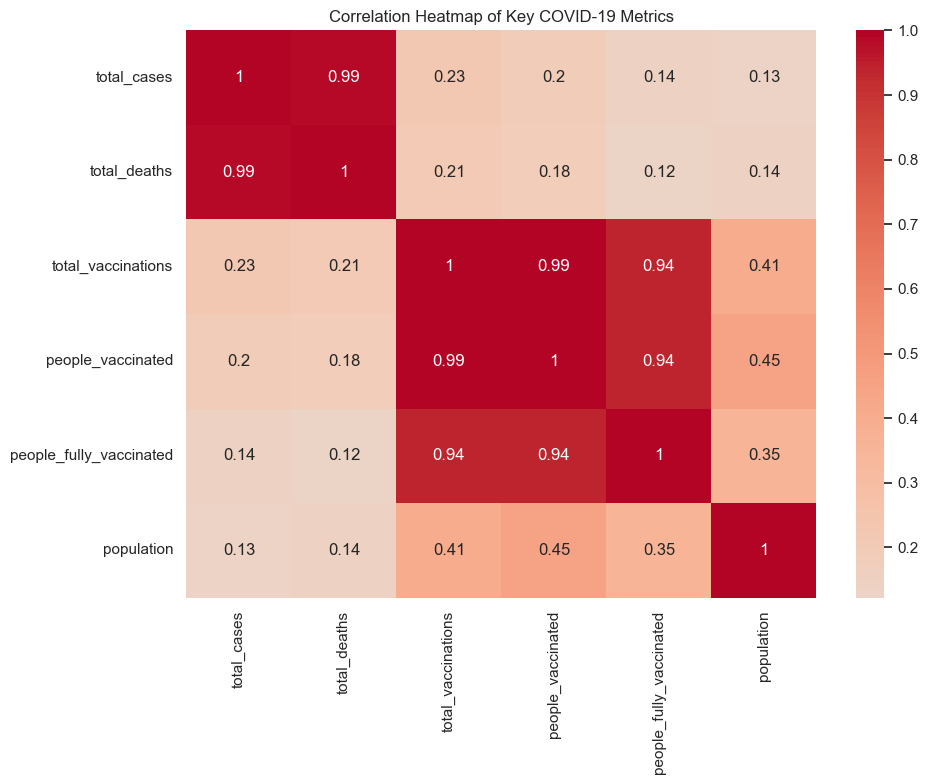

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('default')  # Changed from 'seaborn' to 'default'
sns.set_theme()  # This will apply seaborn's default styling

# 1. Plot total cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Compare daily new cases between countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country, alpha=0.7)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Calculate and plot death rates
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    death_rate = (country_data['total_deaths'] / country_data['total_cases']) * 100
    plt.plot(country_data['date'], death_rate, label=country)

plt.title('COVID-19 Death Rate Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Bar chart of total cases by country
plt.figure(figsize=(10, 6))
latest_data = df_filtered.groupby('location')['total_cases'].max().reset_index()
sns.barplot(data=latest_data, x='location', y='total_cases')
plt.title('Total COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Correlation heatmap for key metrics
key_metrics = ['total_cases', 'total_deaths', 'total_vaccinations', 
               'people_vaccinated', 'people_fully_vaccinated', 'population']

plt.figure(figsize=(10, 8))
correlation_matrix = df_filtered[key_metrics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key COVID-19 Metrics')
plt.tight_layout()
plt.show()